# plot_comparison.ipynb

Author: Robert M. Frost

University of Oklahoma

Created: 06 November 2023

Purpose: Read in all cases to plot comparisons between them

In [1]:
import sys
sys.path.append("/home/rfrost/LES-utils/")

import seaborn
import numpy as np
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.ticker import MultipleLocator
from LESutils import load_full
import seaborn
import cmocean
from matplotlib.gridspec import GridSpec
from matplotlib.colors import ListedColormap

### Settings

In [2]:
# directory to save figures
figdir = "/home/rfrost/manuscript_plots/"
# simulation to analyze
sims = ["full_step_6", "full_step_9", "full_step_12", "full_step_15"]

# z/zi to plot
height = 0.25

# start and end timesteps
t0 = 576000
t1 = 1152000
# start and end in hours
t0hr = t0 * 0.05 / 3600
t1hr = t1 * 0.05 / 3600
# spacing of output
dt = 1000

# lists to store stats, roll factor, and length scales
s_all, r_all, ls_all = [], [], []
# loop over sims
for sim in sims:
    dnc = f"/home/rfrost/simulations/nc/{sim}/"
    # volumetric stats
    s = xr.open_dataset(f"{dnc}{t0}_{t1}_stats.nc")
    # convert time to hours
    s["time"] = s.time / 3600 + t0hr
    s_all.append(s)

    # roll factor
    r = xr.open_dataset(f"{dnc}rollfactor.nc")
    # convert time to hours
    r["time"] = r.time / 3600 + t0hr
    r_all.append(r)

    # length scales
    ls = xr.open_dataset(f"{dnc}{t0}_{t1}_length_scale_rot.nc")
    # convert time to hours
    ls["time"] = ls.time / 3600 + t0hr
    ls_all.append(ls)

In [3]:
# plotting setup

# Set the font weight for plot titles
plt.rcParams['axes.titleweight'] = 'bold'

# Set the font weight for x-axis and y-axis labels
plt.rcParams['axes.labelweight'] = 'normal'

plt.rcParams['text.latex.preamble'] = r'\usepackage{bm}'

# Other plotting setup
rc('font', family='sans-serif')
rc('font', weight='normal', size=20)
rc('figure', facecolor='white')

# lists/cmaps for titles and stuff
ug_list = ["6", "9", "12", "15"]
time_colors = seaborn.color_palette("cubehelix", 7)
ug_colors = seaborn.color_palette("flare", 4)
linestyle = ["--","solid","solid","-.","-."]

In [4]:
# find average T_L at hr 9.8333
T_L = (843.69 + 861.95 + 841.57 + 844.23) / 4

tb = -2
tc = 4.5
td = 11
te = 17.5
tf = 24

tlmax = max((s_all[0].time-10)*3600/T_L)
tlmin = min((s_all[0].time-10)*3600/T_L)

# normalized times to be plot
jttl = [-2, 4.5, 11, 17.5, 24]
jtall = [abs(((s_all[0].time.values-10)*3600)/T_L - jttl[jt]).argmin() for jt in range(len(jttl))]

In [5]:
# calculate TKE and theta*
for i, s in enumerate(s_all):
    s["tke"] = (1/2) * (s.u_var + s.v_var + s.w_var)
    s["thetastar"] = s.tw_cov_tot[:,0] / s.wstar

### Vertical profiles of heat and momentum fluxes

In [6]:
# # colormap
# time_colors = seaborn.color_palette("cubehelix", 7)
# ug_colors = seaborn.color_palette("flare", 4)
# # line styles
# linestyle = ["--","solid","solid","-.","-."]

# fig, ax = plt.subplots(nrows=4, ncols=5, figsize=(19.5,18), sharey=True)

# # normalized heat flux
# axes = [ax[0, 0], ax[1, 0], ax[2, 0], ax[3, 0]]
# for i in range(len(jtall)):
#     time_values = [s_all[j].time[jtall[i]].values for j in range(4)]
#     tw_cov_tot_values = [s_all[j].tw_cov_tot[jtall[i]] for j in range(4)]
#     thetastar_values = [s_all[j].thetastar for j in range(4)]
#     wstar_values = [s_all[j].wstar for j in range(4)]
#     z_values = [s_all[j].z for j in range(4)]
#     labels = [f"$t_*$ = {round(((time_values[j]-10)*3600)/T_L,1)}" for j in range(4)]
#     for j in range(4):
#         axes[j].plot(tw_cov_tot_values[j] / (thetastar_values[j] * wstar_values[j]).isel(time=jtall[i]), z_values[j], 
#                      c=time_colors[i], label=labels[j], lw=2.5, ls=linestyle[i])
#         axes[j].set_xlim(-0.4, 1.1)
#         axes[j].xaxis.set_minor_locator(MultipleLocator(0.1))

# # u variance
# axes = [ax[0, 1], ax[1, 1], ax[2, 1], ax[3, 1]]
# for i in range(len(jtall)):
#     u_var_values = [s_all[j].u_var_rot[jtall[i]] for j in range(4)]
#     wstar_values = [s_all[j].wstar for j in range(4)]
#     z_values = [s_all[j].z for j in range(4)]
#     for j in range(4):
#         axes[j].plot(u_var_values[j] / (wstar_values[j]).isel(time=jtall[i]), z_values[j], 
#                      c=time_colors[i], lw=2.5, ls=linestyle[i])
#         axes[j].set_xlim(-0.1, 3)
#         axes[j].xaxis.set_minor_locator(MultipleLocator(0.25))
#         axes[j].xaxis.set_major_locator(MultipleLocator(1))

# # w variance
# axes = [ax[0, 2], ax[1, 2], ax[2, 2], ax[3, 2]]
# for i in range(len(jtall)):
#     w_var_values = [s_all[j].w_var[jtall[i]] for j in range(4)]
#     wstar_values = [s_all[j].wstar for j in range(4)]
#     z_values = [s_all[j].z for j in range(4)]
#     for j in range(4):
#         axes[j].plot(w_var_values[j] / (wstar_values[j]).isel(time=jtall[i]), z_values[j], 
#                      c=time_colors[i], lw=2.5, ls=linestyle[i])
#         axes[j].set_xlim(-0.1, 1)
#         axes[j].xaxis.set_minor_locator(MultipleLocator(0.1))
#         axes[j].xaxis.set_major_locator(MultipleLocator(0.5))

# # w_var / u_var
# axes = [ax[0, 3], ax[1, 3], ax[2, 3], ax[3, 3]]
# for i in range(len(jtall)):
#     w_var_values = [s_all[j].w_var[jtall[i]] for j in range(4)]
#     u_var_values = [s_all[j].u_var_rot[jtall[i]] for j in range(4)]
#     z_values = [s_all[j].z for j in range(4)]
#     for j in range(4):
#         axes[j].plot(w_var_values[j] / u_var_values[j], z_values[j], 
#                      c=time_colors[i], lw=2.5, ls=linestyle[i])
#         axes[j].set_xlim(-0.1, 3)
#         axes[j].xaxis.set_minor_locator(MultipleLocator(0.25))
#         axes[j].xaxis.set_major_locator(MultipleLocator(1))

# # TKE
# axes = [ax[0, 4], ax[1, 4], ax[2, 4], ax[3, 4]]
# for i in range(len(jtall)):
#     tke_values = [s_all[j].tke[jtall[i]] for j in range(4)]
#     z_values = [s_all[j].z for j in range(4)]
#     for j in range(4):
#         axes[j].plot(tke_values[j] ** 2, z_values[j], 
#                      c=time_colors[i], lw=2.5, ls=linestyle[i])
#         axes[j].set_xlim(-1,21)
#         axes[j].xaxis.set_minor_locator(MultipleLocator(2))

# # xaxis labels
# ax[3,0].set_xlabel("$\\theta'w' / \\theta_*w_*$")
# ax[3,1].set_xlabel("$\sigma_u / w_*$")
# ax[3,2].set_xlabel("$\sigma_w / w_*$")
# ax[3,3].set_xlabel("$\sigma_w / \sigma_u$")
# ax[3,4].set_xlabel("TKE [m$^2$ s$^{-2}$]")

# case = ["6", "9", "12", "15"]
# for i, iax in enumerate(ax[:,0]):
#     iax.set_ylabel("$z$ [m]")
#     iax.set_ylim(0,2000)
#     iax.axvline(x=0, ls="--", alpha=0.5, lw=1.25, color="black")
#     iax.yaxis.set_minor_locator(MultipleLocator(100))
#     iax.yaxis.set_major_locator(MultipleLocator(500))
#     iax.text(-1.1, 1000, f"U{case[i]}", 
#             rotation=90, fontsize=20, va="center", ha="center", weight="bold", c=ug_colors[i])

# # axis titles
# ax[0,0].set_title("(a)", loc="left")
# ax[0,1].set_title("(b)", loc="left")
# ax[0,2].set_title("(c) ", loc="left")
# ax[0,3].set_title("(d)", loc="left")
# ax[0,4].set_title("(e)", loc="left")

# plt.subplots_adjust(hspace=0.3)

# ax[0,0].legend(frameon=False, fontsize=16, loc="upper right")

# plt.tight_layout()
# # # plt.savefig(f"{figdir}fig3.pdf", format="pdf", dpi=300, bbox_inches="tight")

### Cross sections of vertical velocity

In [7]:
# fig = plt.figure(figsize=(23,24))

# gs1 = GridSpec(1, 1, bottom=0.74)
# ax1 = fig.add_subplot(gs1[:,:])
# gs2 = GridSpec(4, 5, top=0.69, bottom=0.08)
# ax2 = fig.add_subplot(gs2[0,0])
# ax3 = fig.add_subplot(gs2[0,1])
# ax4 = fig.add_subplot(gs2[0,2])
# ax5 = fig.add_subplot(gs2[0,3])
# ax6 = fig.add_subplot(gs2[0,4])
# ax7 = fig.add_subplot(gs2[1,0])
# ax8 = fig.add_subplot(gs2[1,1])
# ax9 = fig.add_subplot(gs2[1,2])
# ax10 = fig.add_subplot(gs2[1,3])
# ax11 = fig.add_subplot(gs2[1,4])
# ax12 = fig.add_subplot(gs2[2,0])
# ax13 = fig.add_subplot(gs2[2,1])
# ax14 = fig.add_subplot(gs2[2,2])
# ax15 = fig.add_subplot(gs2[2,3])
# ax16 = fig.add_subplot(gs2[2,4])
# ax17 = fig.add_subplot(gs2[3,0])
# ax18 = fig.add_subplot(gs2[3,1])
# ax19 = fig.add_subplot(gs2[3,2])
# ax20 = fig.add_subplot(gs2[3,3])
# ax21 = fig.add_subplot(gs2[3,4])
# gs3 = GridSpec(1,1, top=0.035, bottom=0.02)
# ax22 = fig.add_subplot(gs3[:,:])

# # zi/L time series
# ug_list = ["6", "9", "12", "15"]
# for i, s in enumerate(s_all):
#     ax1.plot(((s.time - 10)*3600) / T_L, s.zi_L, c=ug_colors[i], 
#              label=f"U{case[i]}", lw=2.5)
# ax1.set_xlim(tlmin,tlmax)
# ax1.legend(frameon=False, fontsize=20)
# # vertical lines
# ax1.axvline(x=tb, lw=1.5, alpha=0.6, ls=linestyle[0], c=time_colors[0])
# ax1.axvline(x=tc, lw=1.5, alpha=0.6, ls=linestyle[1], c=time_colors[1])
# ax1.axvline(x=td, lw=1.5, alpha=0.6, ls=linestyle[2], c=time_colors[2])
# ax1.axvline(x=te, lw=1.5, alpha=0.6, ls=linestyle[3], c=time_colors[3])
# ax1.axvline(x=tf, lw=1.5, alpha=0.6, ls=linestyle[4], c=time_colors[4])
# # text above lines
# ax1.text(tb, 90, "(b)", ha="center", va="center", c=time_colors[0])
# ax1.text(tc, 90, "(c)", ha="center", va="center", c=time_colors[1])
# ax1.text(td, 90, "(d)", ha="center", va="center", c=time_colors[2])
# ax1.text(te, 90, "(e)", ha="center", va="center", c=time_colors[3])
# ax1.text(tf, 90, "(f)", ha="center", va="center", c=time_colors[4])
# # ticks
# ax1.xaxis.set_minor_locator(MultipleLocator(0.5))
# ax1.xaxis.set_major_locator(MultipleLocator(2))
# ax1.yaxis.set_minor_locator(MultipleLocator(5))
# # axis label
# ax1.set_xlabel("$t_*$")
# ax1.set_ylabel("$-z_i$ $/$ $L$")
# # title
# ax1.set_title("(a)", loc="left")

# # contourf plots
# clevs = np.linspace(-2.5,2.5,101)
# # 6 m/s
# sim = 0
# axes = [ax2, ax3, ax4, ax5, ax6]
# time_values = [s_all[sim].time[jtall[i]].values for i in range(len(jtall))]
# w_values = [s_all[sim].w[jtall[i]] for i in range(len(jtall))]
# wstar_values = [s_all[sim].wstar[jtall[i]] for i in range(len(jtall))]
# x_values = s_all[sim].x
# y_values = s_all[sim].y
# lab = ["b", "c", "d", "e", "f"]
# for j in range(5):
#     jz = abs(s_all[0].z/s_all[0].zi[jtall[j]] - height).argmin()
#     cf = axes[j].contourf(x_values/1000, y_values/1000, w_values[j][:,:,jz].T / wstar_values[j],
#                      cmap=mpl.cm.seismic, levels=clevs, extend="both")
#     axes[j].xaxis.set_major_locator(MultipleLocator(4))
#     axes[j].xaxis.set_minor_locator(MultipleLocator(1))
#     axes[j].yaxis.set_major_locator(MultipleLocator(4))
#     axes[j].yaxis.set_minor_locator(MultipleLocator(1))
#     axes[j].set_title(f"({lab[j]}) $\\bf{{t_*}}$ = {round(((s_all[0].time[jtall[j]].values-10)*3600)/T_L,1)}", loc="left", c=time_colors[j])
#     # Manually rasterize each collection in the ContourSet
#     for collection in cf.collections:
#         collection.set_rasterized(True)

# # 9 m/s
# sim = 1
# axes = [ax7, ax8, ax9, ax10, ax11]
# time_values = [s_all[sim].time[jtall[i]].values for i in range(len(jtall))]
# w_values = [s_all[sim].w[jtall[i]] for i in range(len(jtall))]
# wstar_values = [s_all[sim].wstar[jtall[i]] for i in range(len(jtall))]
# x_values = s_all[sim].x
# y_values = s_all[sim].y
# lab = ["g", "h", "i", "j", "k"]
# for j in range(5):
#     jz = abs(s_all[1].z/s_all[1].zi[jtall[j]] - height).argmin()
#     cf = axes[j].contourf(x_values/1000, y_values/1000, w_values[j][:,:,jz].T / wstar_values[j],
#                      cmap=mpl.cm.seismic, levels=clevs, extend="both")
#     axes[j].xaxis.set_major_locator(MultipleLocator(4))
#     axes[j].xaxis.set_minor_locator(MultipleLocator(1))
#     axes[j].yaxis.set_major_locator(MultipleLocator(4))
#     axes[j].yaxis.set_minor_locator(MultipleLocator(1))
#     # axes[j].set_title(f"({lab[j]})", loc="left", c=time_colors[j])
#     # Manually rasterize each collection in the ContourSet
#     for collection in cf.collections:
#         collection.set_rasterized(True)

# # 12 m/s
# sim = 2
# axes = [ax12, ax13, ax14, ax15, ax16]
# time_values = [s_all[sim].time[jtall[i]].values for i in range(len(jtall))]
# w_values = [s_all[sim].w[jtall[i]] for i in range(len(jtall))]
# wstar_values = [s_all[sim].wstar[jtall[i]] for i in range(len(jtall))]
# x_values = s_all[sim].x
# y_values = s_all[sim].y
# lab = ["l", "m", "n", "o", "p"]
# for j in range(5):
#     jz = abs(s_all[2].z/s_all[2].zi[jtall[j]] - height).argmin()
#     cf = axes[j].contourf(x_values/1000, y_values/1000, w_values[j][:,:,jz].T / wstar_values[j],
#                      cmap=mpl.cm.seismic, levels=clevs, extend="both")
#     axes[j].xaxis.set_major_locator(MultipleLocator(4))
#     axes[j].xaxis.set_minor_locator(MultipleLocator(1))
#     axes[j].yaxis.set_major_locator(MultipleLocator(4))
#     axes[j].yaxis.set_minor_locator(MultipleLocator(1))
#     # axes[j].set_title(f"({lab[j]})", loc="left", c=time_colors[j])
#     # Manually rasterize each collection in the ContourSet
#     for collection in cf.collections:
#         collection.set_rasterized(True)

# # 15 m/s
# sim = 3
# axes = [ax17, ax18, ax19, ax20, ax21]
# time_values = [s_all[sim].time[jtall[i]].values for i in range(len(jtall))]
# w_values = [s_all[sim].w[jtall[i]] for i in range(len(jtall))]
# wstar_values = [s_all[sim].wstar[jtall[i]] for i in range(len(jtall))]
# x_values = s_all[sim].x
# y_values = s_all[sim].y
# lab = ["q", "r", "s", "t", "u"]
# for j in range(5):
#     jz = abs(s_all[3].z/s_all[3].zi[jtall[j]] - height).argmin()
#     cf = axes[j].contourf(x_values/1000, y_values/1000, w_values[j][:,:,jz].T / wstar_values[j],
#                      cmap=mpl.cm.seismic, levels=clevs, extend="both")
#     axes[j].xaxis.set_major_locator(MultipleLocator(4))
#     axes[j].xaxis.set_minor_locator(MultipleLocator(1))
#     axes[j].set_xlabel("$x$ [km]")
#     # axes[j].set_title(f"({lab[j]})", loc="left", c=time_colors[j])
#     # Manually rasterize each collection in the ContourSet
#     for collection in cf.collections:
#         collection.set_rasterized(True)

# # axis stuff
# case = ["6", "9", "12", "15"]
# axes = [ax2, ax7, ax12, ax17]
# for ax in axes:
#     ax.yaxis.set_major_locator(MultipleLocator(4))
#     ax.yaxis.set_minor_locator(MultipleLocator(1))
#     ax.set_ylabel("$y$ [km]")
# for i, ax in enumerate(axes):
#     ax.text(-4.25, 6, f"U{case[i]}", 
#             rotation=90, fontsize=20, va="center", ha="center", weight="bold", c=ug_colors[i])
# axes = [ax2, ax7, ax12]
# for ax in axes:
#     ax.set_xticklabels([])
# axes = [ax18, ax19, ax20, ax21]
# for ax in axes:
#     ax.set_yticklabels([])

# # Set tick labels to an empty list for inner subplots
# for ax in [ax3, ax4, ax5, ax6, ax8, ax9, ax10, ax11, ax13, ax14, ax15, ax16]:
#     ax.set_xticklabels([])
#     ax.set_yticklabels([])

# cbar = plt.colorbar(cf, ax22, orientation="horizontal")
# cbar.set_ticks([-2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5])
# cbar.set_label("$w / w_*$")

# plt.subplots_adjust(hspace=0.10, wspace=0.1)

# # plt.savefig(f"{figdir}fig5.pdf", format="pdf", dpi=300, bbox_inches="tight")

### Surface $\zeta$ for the hell of it

In [8]:
# for i, s in enumerate(s_all):
#     s["zeta"] = s.v.differentiate(coord="x") - s.u.differentiate(coord="y")

In [9]:
# fig = plt.figure(figsize=(23,24))

# gs1 = GridSpec(1, 1, bottom=0.74)
# ax1 = fig.add_subplot(gs1[:,:])
# gs2 = GridSpec(4, 5, top=0.69, bottom=0.08)
# ax2 = fig.add_subplot(gs2[0,0])
# ax3 = fig.add_subplot(gs2[0,1])
# ax4 = fig.add_subplot(gs2[0,2])
# ax5 = fig.add_subplot(gs2[0,3])
# ax6 = fig.add_subplot(gs2[0,4])
# ax7 = fig.add_subplot(gs2[1,0])
# ax8 = fig.add_subplot(gs2[1,1])
# ax9 = fig.add_subplot(gs2[1,2])
# ax10 = fig.add_subplot(gs2[1,3])
# ax11 = fig.add_subplot(gs2[1,4])
# ax12 = fig.add_subplot(gs2[2,0])
# ax13 = fig.add_subplot(gs2[2,1])
# ax14 = fig.add_subplot(gs2[2,2])
# ax15 = fig.add_subplot(gs2[2,3])
# ax16 = fig.add_subplot(gs2[2,4])
# ax17 = fig.add_subplot(gs2[3,0])
# ax18 = fig.add_subplot(gs2[3,1])
# ax19 = fig.add_subplot(gs2[3,2])
# ax20 = fig.add_subplot(gs2[3,3])
# ax21 = fig.add_subplot(gs2[3,4])
# gs3 = GridSpec(1,1, top=0.035, bottom=0.02)
# ax22 = fig.add_subplot(gs3[:,:])

# # zi/L time series
# ug_list = ["6", "9", "12", "15"]
# for i, s in enumerate(s_all):
#     ax1.plot(((s.time - 10)*3600) / T_L, s.zi_L, c=ug_colors[i], 
#              label=f"U{ug_list[i]}", lw=2.5)
# ax1.set_xlim(tlmin,tlmax)
# ax1.legend(frameon=False, fontsize=20)
# # vertical lines
# ax1.axvline(x=tb, lw=1.5, alpha=0.6, ls=linestyle[0], c=time_colors[0])
# ax1.axvline(x=tc, lw=1.5, alpha=0.6, ls=linestyle[1], c=time_colors[1])
# ax1.axvline(x=td, lw=1.5, alpha=0.6, ls=linestyle[2], c=time_colors[2])
# ax1.axvline(x=te, lw=1.5, alpha=0.6, ls=linestyle[3], c=time_colors[3])
# ax1.axvline(x=tf, lw=1.5, alpha=0.6, ls=linestyle[4], c=time_colors[4])
# # text above lines
# ax1.text(tb, 90, "(b)", ha="center", va="center", c=time_colors[0])
# ax1.text(tc, 90, "(c)", ha="center", va="center", c=time_colors[1])
# ax1.text(td, 90, "(d)", ha="center", va="center", c=time_colors[2])
# ax1.text(te, 90, "(e)", ha="center", va="center", c=time_colors[3])
# ax1.text(tf, 90, "(f)", ha="center", va="center", c=time_colors[4])
# # ticks
# ax1.xaxis.set_minor_locator(MultipleLocator(0.5))
# ax1.xaxis.set_major_locator(MultipleLocator(2))
# ax1.yaxis.set_minor_locator(MultipleLocator(5))
# # axis label
# ax1.set_xlabel("$t_*$")
# ax1.set_ylabel("$-z_i$ $/$ $L$")
# # title
# ax1.set_title("(a)", loc="left")

# # contourf plots
# clevs = np.linspace(-2.5,2.5,101)
# # 6 m/s
# sim = 0
# axes = [ax2, ax3, ax4, ax5, ax6]
# time_values = [s_all[sim].time[jtall[i]].values for i in range(len(jtall))]
# w_values = [s_all[sim].w[jtall[i]] for i in range(len(jtall))]
# wstar_values = [s_all[sim].wstar[jtall[i]] for i in range(len(jtall))]
# x_values = s_all[sim].x
# y_values = s_all[sim].y
# lab = ["b", "c", "d", "e", "f"]
# for j in range(5):
#     jz = abs(s_all[0].z/s_all[0].zi[jtall[j]] - height).argmin()
#     cf = axes[j].contourf(x_values/1000, y_values/1000, w_values[j][:,:,jz].T / wstar_values[j],
#                      cmap=mpl.cm.seismic, levels=clevs, extend="both")
#     axes[j].xaxis.set_major_locator(MultipleLocator(4))
#     axes[j].xaxis.set_minor_locator(MultipleLocator(1))
#     axes[j].yaxis.set_major_locator(MultipleLocator(4))
#     axes[j].yaxis.set_minor_locator(MultipleLocator(1))
#     axes[j].set_title(f"({lab[j]}) $\\bf{{t_*}}$ = {round(((s_all[0].time[jtall[j]].values-10)*3600)/T_L,1)}", loc="left", c=time_colors[j])
#     # Manually rasterize each collection in the ContourSet
#     for collection in cf.collections:
#         collection.set_rasterized(True)

# # 9 m/s
# sim = 1
# axes = [ax7, ax8, ax9, ax10, ax11]
# time_values = [s_all[sim].time[jtall[i]].values for i in range(len(jtall))]
# w_values = [s_all[sim].w[jtall[i]] for i in range(len(jtall))]
# wstar_values = [s_all[sim].wstar[jtall[i]] for i in range(len(jtall))]
# x_values = s_all[sim].x
# y_values = s_all[sim].y
# lab = ["g", "h", "i", "j", "k"]
# for j in range(5):
#     jz = abs(s_all[1].z/s_all[1].zi[jtall[j]] - height).argmin()
#     cf = axes[j].contourf(x_values/1000, y_values/1000, w_values[j][:,:,jz].T / wstar_values[j],
#                      cmap=mpl.cm.seismic, levels=clevs, extend="both")
#     axes[j].xaxis.set_major_locator(MultipleLocator(4))
#     axes[j].xaxis.set_minor_locator(MultipleLocator(1))
#     axes[j].yaxis.set_major_locator(MultipleLocator(4))
#     axes[j].yaxis.set_minor_locator(MultipleLocator(1))
#     # axes[j].set_title(f"({lab[j]})", loc="left", c=time_colors[j])
#     # Manually rasterize each collection in the ContourSet
#     for collection in cf.collections:
#         collection.set_rasterized(True)

# # 12 m/s
# sim = 2
# axes = [ax12, ax13, ax14, ax15, ax16]
# time_values = [s_all[sim].time[jtall[i]].values for i in range(len(jtall))]
# w_values = [s_all[sim].w[jtall[i]] for i in range(len(jtall))]
# wstar_values = [s_all[sim].wstar[jtall[i]] for i in range(len(jtall))]
# x_values = s_all[sim].x
# y_values = s_all[sim].y
# lab = ["l", "m", "n", "o", "p"]
# for j in range(5):
#     jz = abs(s_all[2].z/s_all[2].zi[jtall[j]] - height).argmin()
#     cf = axes[j].contourf(x_values/1000, y_values/1000, w_values[j][:,:,jz].T / wstar_values[j],
#                      cmap=mpl.cm.seismic, levels=clevs, extend="both")
#     axes[j].xaxis.set_major_locator(MultipleLocator(4))
#     axes[j].xaxis.set_minor_locator(MultipleLocator(1))
#     axes[j].yaxis.set_major_locator(MultipleLocator(4))
#     axes[j].yaxis.set_minor_locator(MultipleLocator(1))
#     # axes[j].set_title(f"({lab[j]})", loc="left", c=time_colors[j])
#     # Manually rasterize each collection in the ContourSet
#     for collection in cf.collections:
#         collection.set_rasterized(True)

# # 15 m/s
# sim = 3
# axes = [ax17, ax18, ax19, ax20, ax21]
# time_values = [s_all[sim].time[jtall[i]].values for i in range(len(jtall))]
# w_values = [s_all[sim].w[jtall[i]] for i in range(len(jtall))]
# wstar_values = [s_all[sim].wstar[jtall[i]] for i in range(len(jtall))]
# x_values = s_all[sim].x
# y_values = s_all[sim].y
# lab = ["q", "r", "s", "t", "u"]
# for j in range(5):
#     jz = abs(s_all[3].z/s_all[3].zi[jtall[j]] - height).argmin()
#     cf = axes[j].contourf(x_values/1000, y_values/1000, w_values[j][:,:,jz].T / wstar_values[j],
#                      cmap=mpl.cm.seismic, levels=clevs, extend="both")
#     axes[j].xaxis.set_major_locator(MultipleLocator(4))
#     axes[j].xaxis.set_minor_locator(MultipleLocator(1))
#     axes[j].set_xlabel("$x$ [km]")
#     # axes[j].set_title(f"({lab[j]})", loc="left", c=time_colors[j])
#     # Manually rasterize each collection in the ContourSet
#     for collection in cf.collections:
#         collection.set_rasterized(True)

# # axis stuff
# case = ["6", "9", "12", "15"]
# axes = [ax2, ax7, ax12, ax17]
# for ax in axes:
#     ax.yaxis.set_major_locator(MultipleLocator(4))
#     ax.yaxis.set_minor_locator(MultipleLocator(1))
#     ax.set_ylabel("$y$ [km]")
# for i, ax in enumerate(axes):
#     ax.text(-4.25, 6, f"U{case[i]}", 
#             rotation=90, fontsize=20, va="center", ha="center", weight="bold", c=ug_colors[i])
# axes = [ax2, ax7, ax12]
# for ax in axes:
#     ax.set_xticklabels([])
# axes = [ax18, ax19, ax20, ax21]
# for ax in axes:
#     ax.set_yticklabels([])

# # Set tick labels to an empty list for inner subplots
# for ax in [ax3, ax4, ax5, ax6, ax8, ax9, ax10, ax11, ax13, ax14, ax15, ax16]:
#     ax.set_xticklabels([])
#     ax.set_yticklabels([])

# cbar = plt.colorbar(cf, ax22, orientation="horizontal")
# cbar.set_ticks([-2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5])
# cbar.set_label("$w / w_*$")

# plt.subplots_adjust(hspace=0.10, wspace=0.1)

# # plt.savefig(f"{figdir}fig5.pdf", format="pdf", dpi=300, bbox_inches="tight")

### Entrainment time-height series

In [10]:
# find average T_L at hr 9.8333
T_L = ((843.69 + 861.95 + 841.57 + 844.23) / 4) / 3600
tlmax = max((s_all[0].time-10)/T_L)
tlmin = min((s_all[0].time-10)/T_L)

# extract helpful arrays
time = (s_all[0].time - 10) / T_L
z = s_all[0].z

# find lowest zero value heat flux
negative = np.empty(time.size)
for i, s in enumerate(s_all):
    tw = s.tw_cov_tot.values
    for jt in range(time.size):
        negative[jt] = np.where(tw[jt] <= 0)[0][0]
    s["tw_zero"] = [s.z[negative[jt].astype(int)] for jt in range(time.size)]

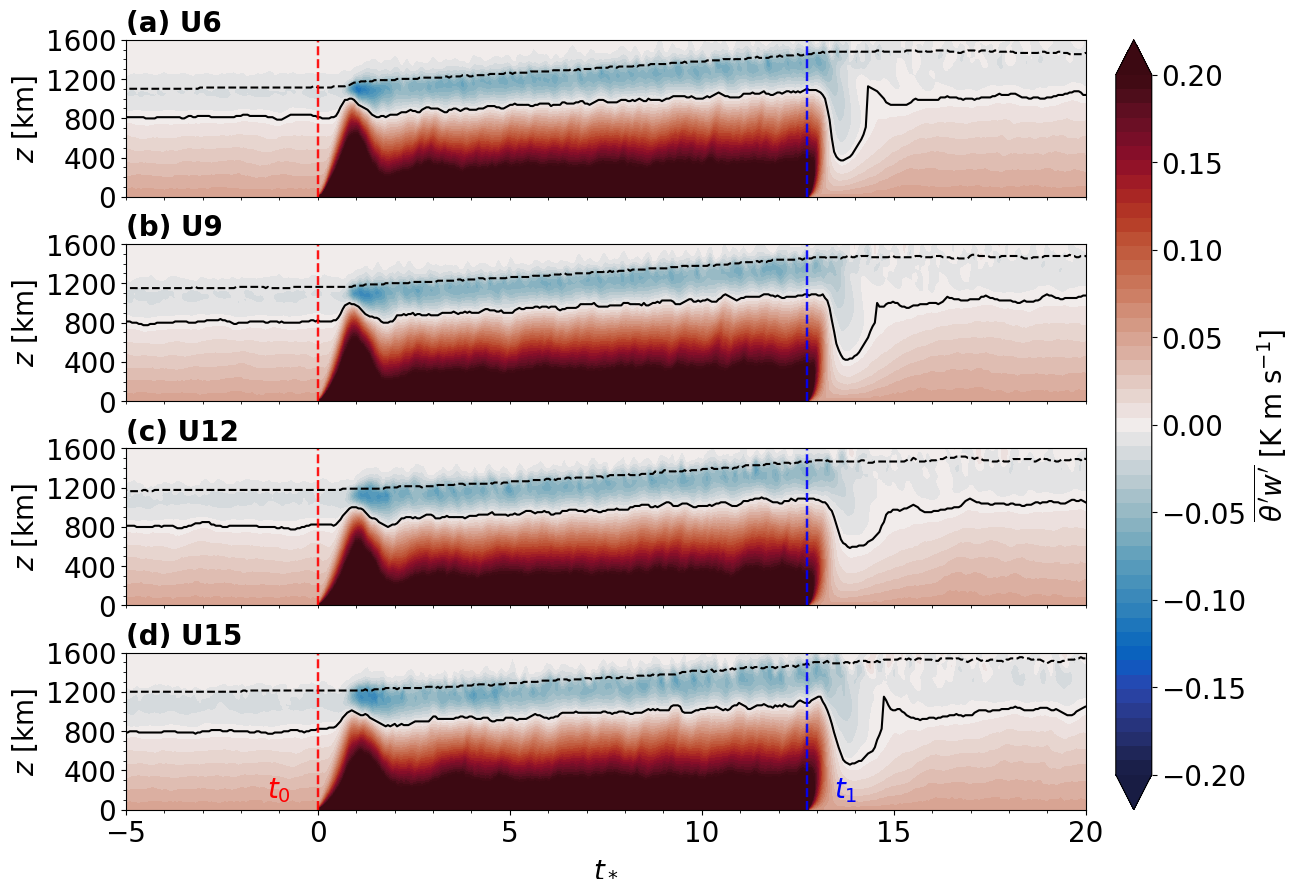

In [11]:
clevs = np.linspace(-0.2, 0.2, 50)

fig = plt.figure(figsize=(12,10))

gs1 = GridSpec(4, 1, right=0.925, hspace=0.3)
ax1 = fig.add_subplot(gs1[0])
ax2 = fig.add_subplot(gs1[1], sharex=ax1, sharey=ax1)
ax3 = fig.add_subplot(gs1[2], sharex=ax1, sharey=ax1)
ax4 = fig.add_subplot(gs1[3], sharey=ax1)
gs2 = GridSpec(1, 4, left=0.95, right=0.98)
ax5 = fig.add_subplot(gs2[:,:])

# 6 m/s
cf = ax1.contourf(time, z, s_all[0].tw_cov_tot.T, clevs, 
             extend="both", cmap=cmocean.cm.balance)
ax1.plot(time, s_all[0].tw_zero, c="black", ls="solid")
ax1.plot(time, s_all[0].zi, c="black", ls="dashed")
# 9 m/s
ax2.contourf(time, z, s_all[1].tw_cov_tot.T, clevs, 
             extend="both", cmap=cmocean.cm.balance)
ax2.plot(time, s_all[1].tw_zero, c="black", ls="solid")
ax2.plot(time, s_all[1].zi, c="black", ls="dashed")
# 12 m/s
ax3.contourf(time, z, s_all[2].tw_cov_tot.T, clevs, 
             extend="both", cmap=cmocean.cm.balance)
ax3.plot(time, s_all[2].tw_zero, c="black", ls="solid")
ax3.plot(time, s_all[2].zi, c="black", ls="dashed")
ax3.set_xticks([])
# 15 m/s
ax4.contourf(time, z, s_all[3].tw_cov_tot.T, clevs, 
             extend="both", cmap=cmocean.cm.balance)
ax4.plot(time, s_all[3].tw_zero, c="black", ls="solid")
ax4.plot(time, s_all[3].zi, c="black", ls="dashed")
ax4.set_xlim(-5,20)
ax4.xaxis.set_major_locator(MultipleLocator(5))
ax4.xaxis.set_minor_locator(MultipleLocator(1))

cb = plt.colorbar(cf, ax5)
cb.set_ticks(np.arange(-0.2,0.21,0.05))
cb.set_label("$\overline{\\theta' w'}$ [K m s$^{-1}$]")

ax1.set_ylim(0,1600)
ax1.set_xlim(-5,20)

axes = [ax1,ax2,ax3]
for ax in axes:
    ax.set_ylabel("$z$ [km]")
    ax.yaxis.set_major_locator(MultipleLocator(400))
    ax.yaxis.set_minor_locator(MultipleLocator(100))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.set_xticks([])

ax1.set_title(f"(a) U{ug_list[0]}", loc="left", fontsize=20)
ax2.set_title(f"(b) U{ug_list[1]}", loc="left", fontsize=20)
ax3.set_title(f"(c) U{ug_list[2]}", loc="left", fontsize=20)
ax4.set_title(f"(d) U{ug_list[3]}", loc="left", fontsize=20)

axes = [ax1,ax2,ax3,ax4]
for ax in axes:
    ax.set_ylabel("$z$ [km]")
    ax.axvline(x=0, c="red", lw=1.75, alpha=0.9, ls="--")
    ax.axvline(x=3/T_L, c="blue", lw=1.75, alpha=0.9, ls="--")

ax4.text(0-1, 200, "$t_0$", ha="center", va="center", c="red")
ax4.text(3/T_L+1, 200, "$t_1$", ha="center", va="center", c="blue")
ax4.set_xlabel("$t_*$")

plt.savefig(f"{figdir}tw_th.pdf", format="pdf", dpi=300, bbox_inches="tight")

In [12]:
# cmin, cmax = 302, 308
# clevs = np.linspace(cmin, cmax, 100)
# cmap = cmocean.cm.thermal

# for i, s in enumerate(s_all):
#     s["theta_th"] = s.theta_mean
#     # s["theta_th"] = (s.theta_mean - s.theta_mean[:,0]) / s.thetastar

# fig = plt.figure(figsize=(12,10))

# gs1 = GridSpec(4, 1, right=0.925, hspace=0.3)
# ax1 = fig.add_subplot(gs1[0])
# ax2 = fig.add_subplot(gs1[1], sharex=ax1, sharey=ax1)
# ax3 = fig.add_subplot(gs1[2], sharex=ax1, sharey=ax1)
# ax4 = fig.add_subplot(gs1[3], sharey=ax1)
# gs2 = GridSpec(1, 4, left=0.95, right=0.98)
# ax5 = fig.add_subplot(gs2[:,:])

# # 6 m/s
# cf = ax1.contourf(time, z, s_all[0].theta_th.T, clevs,
#                   extend="both", cmap=cmap)
# ax1.plot(time, s_all[0].zi, c="black", ls="dashed")
# ax1.plot(time, s_all[0].tw_zero, c="black", ls="solid")
# # 9 m/s
# ax2.contourf(time, z, s_all[1].theta_th.T, clevs, 
#              extend="both", cmap=cmap)
# ax2.plot(time, s_all[1].zi, c="black", ls="dashed")
# ax2.plot(time, s_all[1].tw_zero, c="black", ls="solid")
# # 12 m/s
# ax3.contourf(time, z, s_all[2].theta_th.T, clevs, 
#              extend="both", cmap=cmap)
# ax3.plot(time, s_all[2].zi, c="black", ls="dashed")
# ax3.plot(time, s_all[2].tw_zero, c="black", ls="solid")
# # 15 m/s
# ax4.contourf(time, z, s_all[3].theta_th.T, clevs, 
#              extend="both", cmap=cmap)
# ax4.plot(time, s_all[3].zi, c="black", ls="dashed")
# ax4.plot(time, s_all[3].tw_zero, c="black", ls="solid")
# ax4.set_xlim(-5,20)
# ax4.xaxis.set_major_locator(MultipleLocator(5))
# ax4.xaxis.set_minor_locator(MultipleLocator(1))

# cb = plt.colorbar(cf, ax5)
# cb.set_ticks(np.arange(cmin,cmax+0.1,2))
# cb.set_label("$\\theta$ [K]")

# ax1.set_ylim(0,1600)
# ax1.set_xlim(-5,20)

# axes = [ax1,ax2,ax3]
# for ax in axes:
#     ax.yaxis.set_major_locator(MultipleLocator(400))
#     ax.yaxis.set_minor_locator(MultipleLocator(100))
#     ax.xaxis.set_minor_locator(MultipleLocator(1))
#     ax.xaxis.set_major_locator(MultipleLocator(5))
#     ax.set_xticks([])

# ax1.set_title(f"(a) U{ug_list[0]}", loc="left", fontsize=20)
# ax2.set_title(f"(b) U{ug_list[1]}", loc="left", fontsize=20)
# ax3.set_title(f"(c) U{ug_list[2]}", loc="left", fontsize=20)
# ax4.set_title(f"(d) U{ug_list[3]}", loc="left", fontsize=20)

# axes = [ax1,ax2,ax3,ax4]
# for ax in axes:
#     ax.set_ylabel("$z$ [km]")
#     ax.axvline(x=0, c="red", lw=1.75, alpha=0.9, ls="--")
#     ax.axvline(x=3/T_L, c="blue", lw=1.75, alpha=0.9, ls="--")

# ax4.text(0-1, 200, "$t_0$", ha="center", va="center", c="red")
# ax4.text(3/T_L+1, 200, "$t_1$", ha="center", va="center", c="blue")
# ax4.set_xlabel("$t_*$")

# # plt.savefig(f"{figdir}t_th.pdf", format="pdf", dpi=300, bbox_inches="tight")

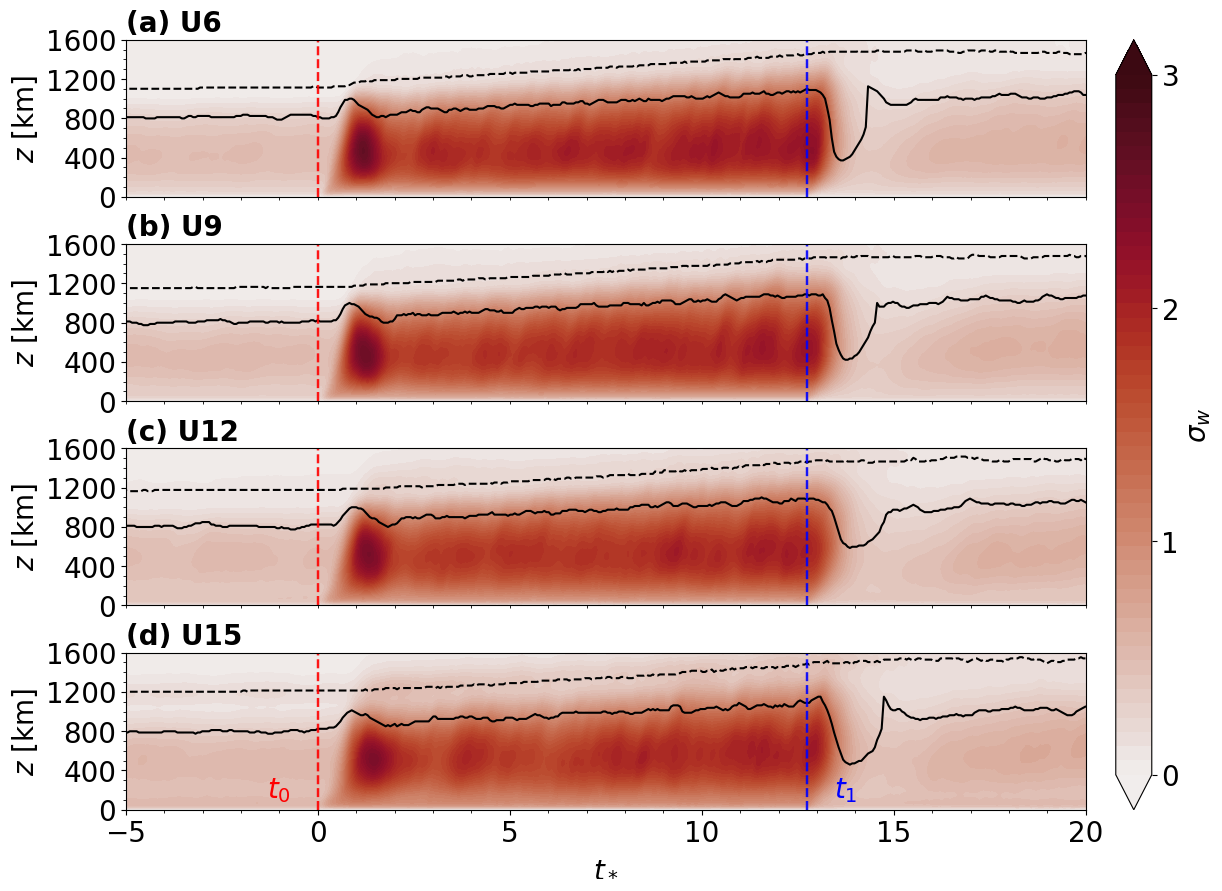

In [13]:
cmax, cmin = 0, 3
clevs = np.linspace(cmax, cmin, 50)
cmap = cmocean.cm.amp
nx, ny = s_all[0].x.size, s_all[0].y.size

fig = plt.figure(figsize=(12,10))

gs1 = GridSpec(4, 1, right=0.925, hspace=0.3)
ax1 = fig.add_subplot(gs1[0])
ax2 = fig.add_subplot(gs1[1], sharex=ax1, sharey=ax1)
ax3 = fig.add_subplot(gs1[2], sharex=ax1, sharey=ax1)
ax4 = fig.add_subplot(gs1[3], sharey=ax1)
gs2 = GridSpec(1, 4, left=0.95, right=0.98)
ax5 = fig.add_subplot(gs2[:,:])

# 6 m/s
cf = ax1.contourf(time, z, s_all[0].w_var.T, clevs,
                  extend="both", cmap=cmap)
ax1.plot(time, s_all[0].zi, c="black", ls="dashed")
ax1.plot(time, s_all[0].tw_zero, c="black", ls="solid")
# 9 m/s
ax2.contourf(time, z, s_all[1].w_var.T, clevs,
             extend="both", cmap=cmap)
ax2.plot(time, s_all[1].zi, c="black", ls="dashed")
ax2.plot(time, s_all[1].tw_zero, c="black", ls="solid")
# 12 m/s
ax3.contourf(time, z, s_all[2].w_var.T, clevs,
             extend="both", cmap=cmap)
ax3.plot(time, s_all[2].zi, c="black", ls="dashed")
ax3.plot(time, s_all[2].tw_zero, c="black", ls="solid")
# 15 m/s
ax4.contourf(time, z, s_all[3].w_var.T, clevs,
             extend="both", cmap=cmap)
ax4.plot(time, s_all[3].zi, c="black", ls="dashed")
ax4.plot(time, s_all[3].tw_zero, c="black", ls="solid")
ax4.set_xlim(-5,20)
ax4.xaxis.set_major_locator(MultipleLocator(5))
ax4.xaxis.set_minor_locator(MultipleLocator(1))

cb = plt.colorbar(cf, ax5)
cb.set_ticks(np.arange(cmax,cmin+0.1,1))
cb.set_label("$\\sigma_w$")

ax1.set_ylim(0,1600)
ax1.set_xlim(-5,20)

axes = [ax1,ax2,ax3]
for ax in axes:
    ax.yaxis.set_major_locator(MultipleLocator(400))
    ax.yaxis.set_minor_locator(MultipleLocator(100))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.set_xticks([])

ax1.set_title(f"(a) U{ug_list[0]}", loc="left", fontsize=20)
ax2.set_title(f"(b) U{ug_list[1]}", loc="left", fontsize=20)
ax3.set_title(f"(c) U{ug_list[2]}", loc="left", fontsize=20)
ax4.set_title(f"(d) U{ug_list[3]}", loc="left", fontsize=20)

axes = [ax1,ax2,ax3,ax4]
for ax in axes:
    ax.set_ylabel("$z$ [km]")
    ax.axvline(x=0, c="red", lw=1.75, alpha=0.9, ls="--")
    ax.axvline(x=3/T_L, c="blue", lw=1.75, alpha=0.9, ls="--")

ax4.text(0-1, 200, "$t_0$", ha="center", va="center", c="red")
ax4.text(3/T_L+1, 200, "$t_1$", ha="center", va="center", c="blue")
ax4.set_xlabel("$t_*$")

plt.savefig(f"{figdir}ww_th.pdf", format="pdf", dpi=300, bbox_inches="tight")

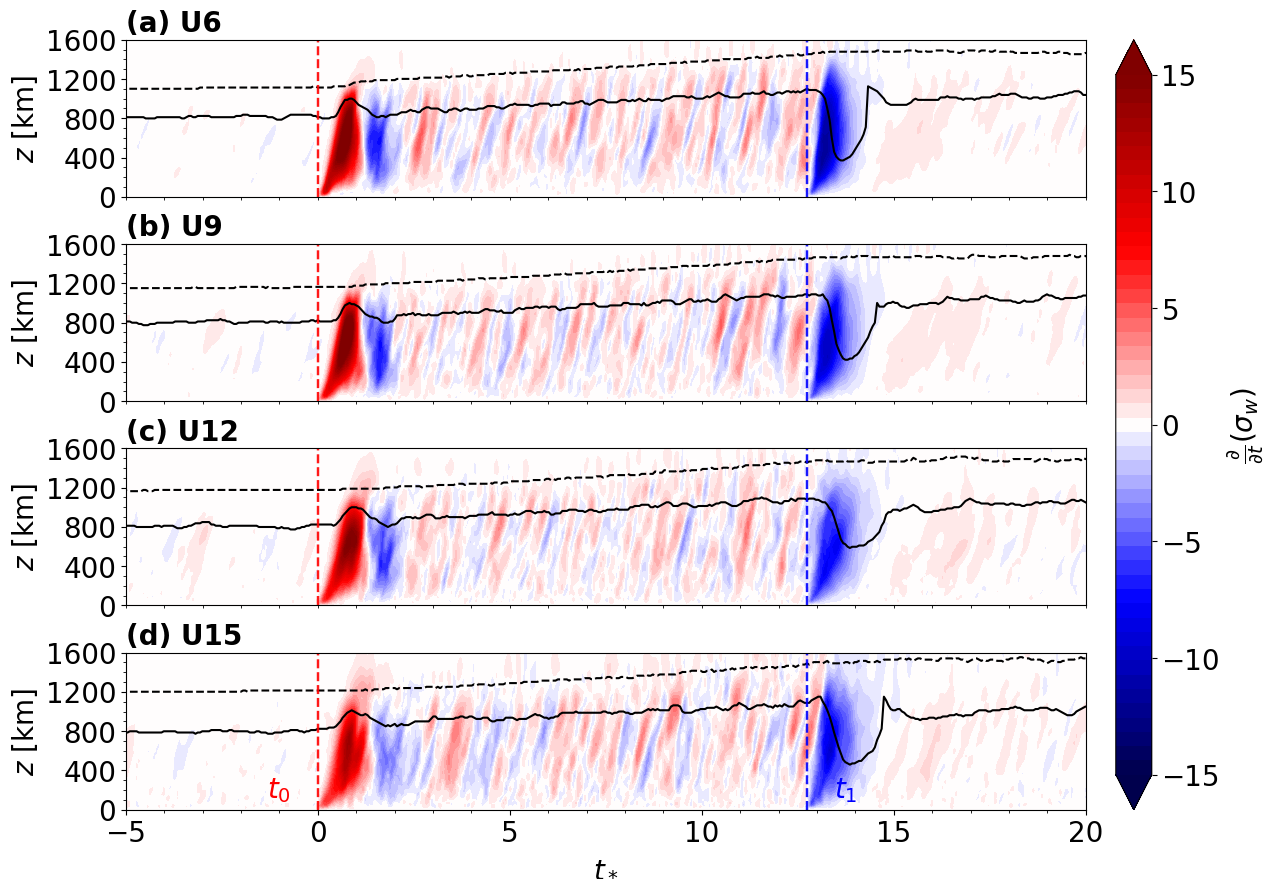

In [14]:
cmax, cmin = -15, 15
clevs = np.linspace(cmax, cmin, 50)
cmap = mpl.cm.seismic
nx, ny = s_all[0].x.size, s_all[0].y.size

for i, s in enumerate(s_all):
    s["dwvar_dt"] = s.w_var.differentiate(coord="time")

fig = plt.figure(figsize=(12,10))

gs1 = GridSpec(4, 1, right=0.925, hspace=0.3)
ax1 = fig.add_subplot(gs1[0])
ax2 = fig.add_subplot(gs1[1], sharex=ax1, sharey=ax1)
ax3 = fig.add_subplot(gs1[2], sharex=ax1, sharey=ax1)
ax4 = fig.add_subplot(gs1[3], sharey=ax1)
gs2 = GridSpec(1, 4, left=0.95, right=0.98)
ax5 = fig.add_subplot(gs2[:,:])

# 6 m/s
cf = ax1.contourf(time, z, s_all[0].dwvar_dt.T, clevs,
                  extend="both", cmap=cmap)
ax1.plot(time, s_all[0].zi, c="black", ls="dashed")
ax1.plot(time, s_all[0].tw_zero, c="black", ls="solid")
# 9 m/s
ax2.contourf(time, z, s_all[1].dwvar_dt.T, clevs,
             extend="both", cmap=cmap)
ax2.plot(time, s_all[1].zi, c="black", ls="dashed")
ax2.plot(time, s_all[1].tw_zero, c="black", ls="solid")
# 12 m/s
ax3.contourf(time, z, s_all[2].dwvar_dt.T, clevs,
             extend="both", cmap=cmap)
ax3.plot(time, s_all[2].zi, c="black", ls="dashed")
ax3.plot(time, s_all[2].tw_zero, c="black", ls="solid")
# 15 m/s
ax4.contourf(time, z, s_all[3].dwvar_dt.T, clevs,
             extend="both", cmap=cmap)
ax4.plot(time, s_all[3].zi, c="black", ls="dashed")
ax4.plot(time, s_all[3].tw_zero, c="black", ls="solid")
ax4.set_xlim(-5,20)
ax4.xaxis.set_major_locator(MultipleLocator(5))
ax4.xaxis.set_minor_locator(MultipleLocator(1))

cb = plt.colorbar(cf, ax5)
cb.set_ticks(np.arange(cmax,cmin+0.1,5))
cb.set_label("$\\frac{\partial}{\partial t} (\\sigma_w)$")

ax1.set_ylim(0,1600)
ax1.set_xlim(-5,20)

axes = [ax1,ax2,ax3]
for ax in axes:
    ax.yaxis.set_major_locator(MultipleLocator(400))
    ax.yaxis.set_minor_locator(MultipleLocator(100))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.set_xticks([])

ax1.set_title(f"(a) U{ug_list[0]}", loc="left", fontsize=20)
ax2.set_title(f"(b) U{ug_list[1]}", loc="left", fontsize=20)
ax3.set_title(f"(c) U{ug_list[2]}", loc="left", fontsize=20)
ax4.set_title(f"(d) U{ug_list[3]}", loc="left", fontsize=20)

axes = [ax1,ax2,ax3,ax4]
for ax in axes:
    ax.set_ylabel("$z$ [km]")
    ax.axvline(x=0, c="red", lw=1.75, alpha=0.9, ls="--")
    ax.axvline(x=3/T_L, c="blue", lw=1.75, alpha=0.9, ls="--")

ax4.text(0-1, 200, "$t_0$", ha="center", va="center", c="red")
ax4.text(3/T_L+1, 200, "$t_1$", ha="center", va="center", c="blue")
ax4.set_xlabel("$t_*$")

plt.savefig(f"{figdir}wwdt_th.pdf", format="pdf", dpi=300, bbox_inches="tight")

### $z_i$ timeseries

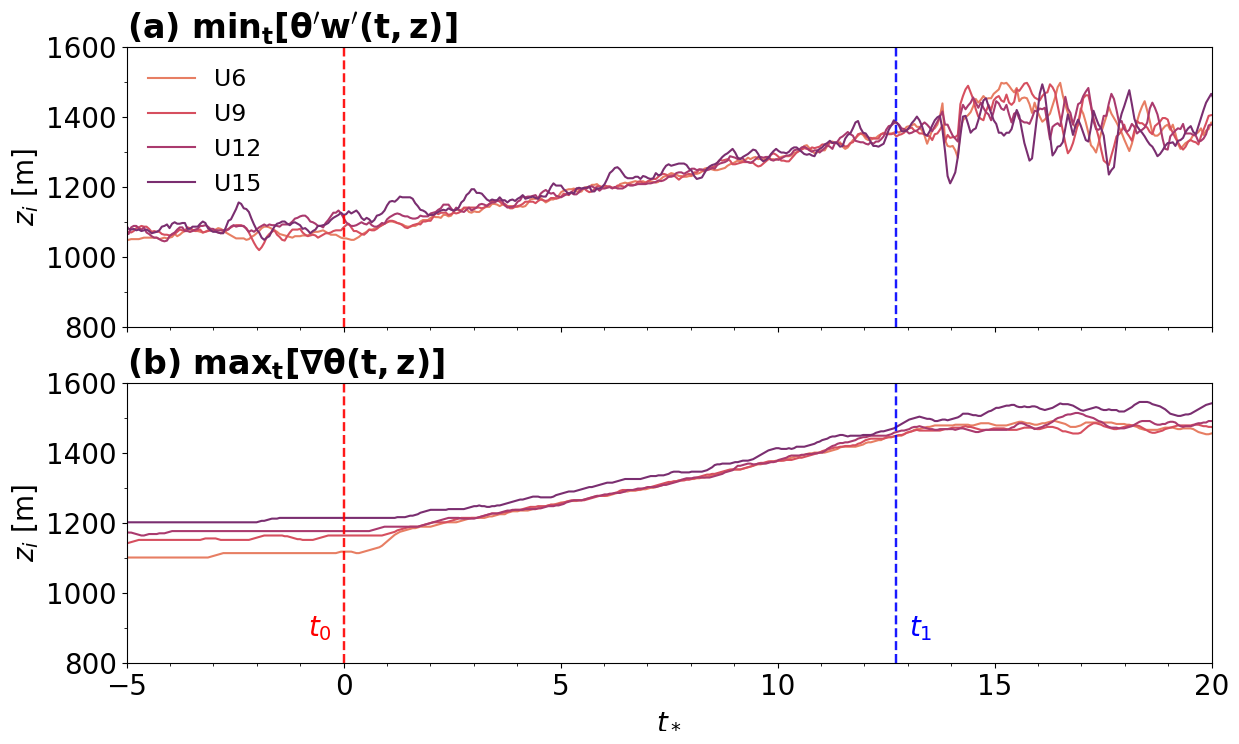

In [15]:
fig, ax = plt.subplots(figsize=(14,8), nrows=2, sharex=True, sharey=True)

for i, s in enumerate(s_all):
    idx = s.tw_cov_tot.argmin(axis=1)
    zi = s.z[idx]

    ax[0].plot(time, zi.rolling(time=6).mean(), c=ug_colors[i], label=f"U{ug_list[i]}")
    ax[1].plot(time, s.zi.rolling(time=6).mean(), c=ug_colors[i])

ax[0].legend(frameon=False, loc="upper left", fontsize=17)

for i, iax in enumerate(ax):
    iax.set_xlim(-5,20)

    iax.yaxis.set_minor_locator(MultipleLocator(100))
    iax.xaxis.set_major_locator(MultipleLocator(5))
    iax.xaxis.set_minor_locator(MultipleLocator(1))

    iax.set_ylabel("$z_i$ [m]")

    iax.axvline(x=0, c="red", lw=1.75, alpha=0.9, ls="--")
    iax.axvline(x=3/T_L, c="blue", lw=1.75, alpha=0.9, ls="--")

ax[0].set_title("(a) min$\\bf{_{t} [\\theta'w'(t,z)]}$", loc="left")
ax[1].set_title("(b) max$\\bf{_{t} [\\nabla \\theta}(t,z)]$", loc="left")

ax[1].set_ylim(800, 1600)
ax[1].set_xlabel("$t_*$")

ax[1].text(0-0.55, 900, "$t_0$", ha="center", va="center", c="red")
ax[1].text(3/T_L+0.55, 900, "$t_1$", ha="center", va="center", c="blue")

plt.savefig(f"{figdir}zi_ts.pdf", format="pdf", dpi=300, bbox_inches="tight")

### Print values for table 1 in manuscript

In [16]:
# sim = 3 # 0 = 6 m/s, 1 = 9 m/s, and so on
# t = 1 # 0 = t0, 1 = t1
# ug = [6, 9, 12, 15]
# jthr = [9.83333, 12.83333]
# jt = abs(s_all[sim].time.values - jthr[t]).argmin()

# print(f"Ug = {ug[sim]} m/s, t = {jthr[t]} hr")
# print(f"|L| = {round(abs(s_all[sim].L.isel(time=jt).values),2)}")
# print(f"-z_i / L = {round(float(s_all[sim].zi_L.isel(time=jt).values),2)}")
# print(f"u_* = {round(float(s_all[sim].ustar0.isel(time=jt).values),2)}")
# print(f"w_* = {round(float(s_all[sim].wstar.isel(time=jt).values),2)}")
# print(f"T_L = {round(float(s_all[sim].zi.isel(time=jt).values/s_all[sim].wstar.isel(time=jt).values),2)}")